# Camera Calibration

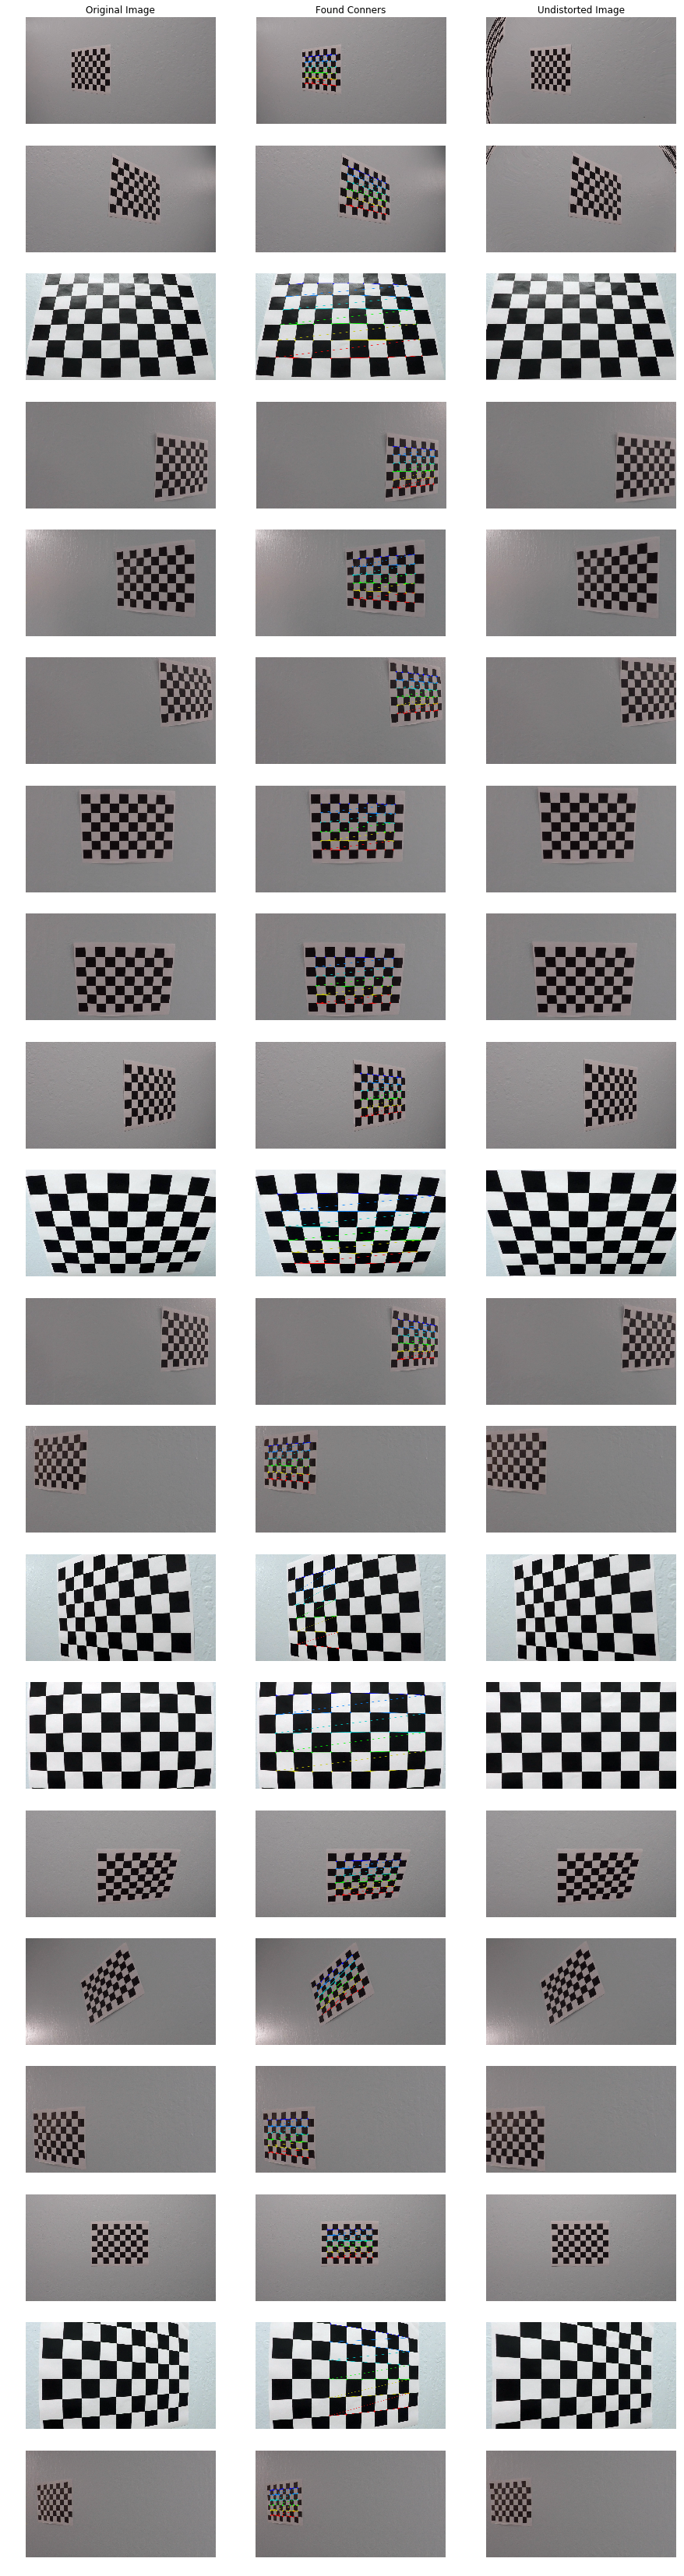

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
import glob


# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# prepare object points
# different types of object points number
type_num = 6
nx = [9,8,9,9,7,5]
ny = [6,6,5,4,6,6]

objpoints = []
imgpoints = []

objps = []
for i in range(type_num):
    objp = np.zeros((nx[i]*ny[i],3), np.float32)
    objp[:,:2] = np.mgrid[0:nx[i],0:ny[i]].T.reshape(-1,2)
    objps.append(objp)

image_num = len(images)
fig=plt.figure(figsize=(15, 60))

for idx, image_name in enumerate(images):
    # Read image
    img = cv2.imread(image_name)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    for i in range(type_num):
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx[i], ny[i]), None)

        # If found, draw corners
        if ret == True:
            objpoints.append(objps[i])
            imgpoints.append(corners)
            
            fig.add_subplot(image_num, 3, idx*3+1)
            plt.imshow(img)
            plt.axis('off')
            if idx == 0:
                plt.title("Original Image")
            
            img1 = np.copy(img)
            cv2.drawChessboardCorners(img1, (nx[i],ny[i]), corners, ret)
            fig.add_subplot(image_num, 3, idx*3+2)
            plt.imshow(img1)
            plt.axis('off')
            if idx == 0:
                plt.title("Found Conners")

            ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
            undist = cv2.undistort(img, mtx, dist, None, mtx)
            fig.add_subplot(image_num, 3, idx*3+3)
            plt.imshow(undist)
            plt.axis('off')
            if idx == 0:
                plt.title("Undistorted Image")
            break

plt.show()